In [1]:
import numpy as np
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet50V2
import cv2
from IPython.display import Image

In [2]:
(train_X_mnist, train_y_mnist), (test_X_mnist, test_y_mnist) = mnist.load_data()
train_X_mnist = train_X_mnist.reshape(60000,28,28,1)
test_X_mnist = test_X_mnist.reshape(10000,28,28,1)

(train_X_fashion_mnist, train_y_fashion_mnist), (test_X_fashion_mnist, test_y_fashion_mnist) = fashion_mnist.load_data()
train_X_fashion_mnist = train_X_fashion_mnist.reshape(60000,28,28,1)
test_X_fashion_mnist = test_X_fashion_mnist.reshape(10000,28,28,1)

In [3]:
train_y_mnist = to_categorical(train_y_mnist)
test_y_mnist = to_categorical(test_y_mnist)
train_y_fashion_mnist = to_categorical(train_y_fashion_mnist)
test_y_fashion_mnist = to_categorical(test_y_fashion_mnist)

# LeNet

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

2022-05-03 18:49:02.947233: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1776 - accuracy: 0.9463 - val_loss: 0.0816 - val_accuracy: 0.9731


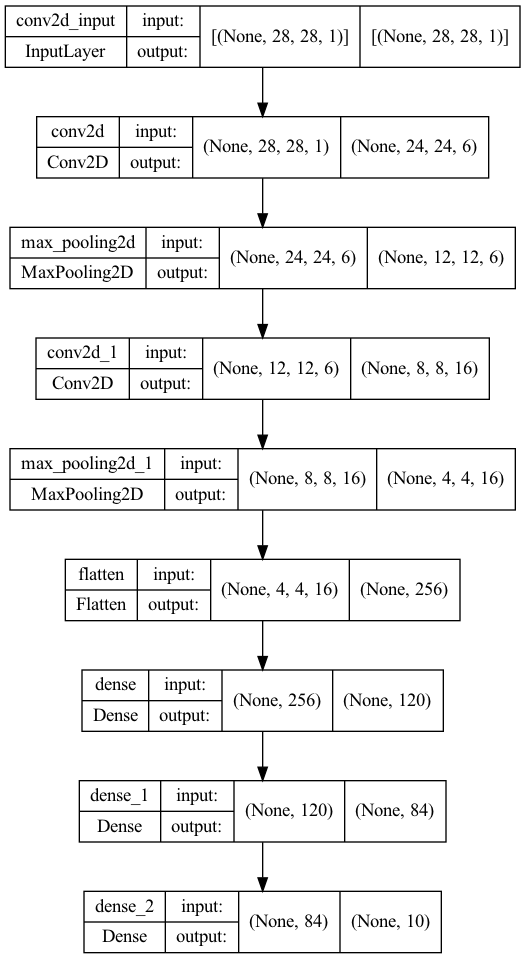

In [4]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(train_X_mnist, train_y_mnist, validation_data=(test_X_mnist, test_y_mnist), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='LeNet.png')

Image('LeNet.png')

# AlexNet

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 128)       

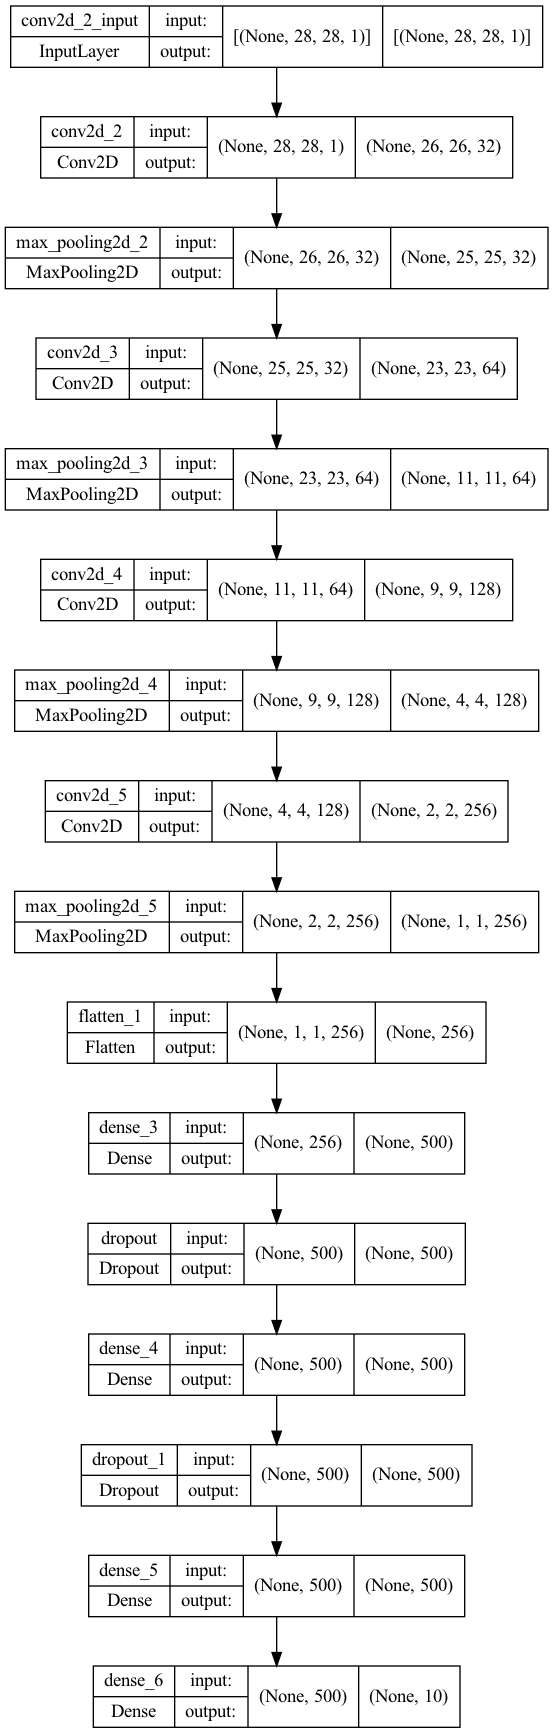

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(train_X_mnist, train_y_mnist, validation_data=(test_X_mnist, test_y_mnist), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='AlexNet.png')

Image('AlexNet.png')

# VGG16

58900480/58889256 [==============================] - 5s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 4096)              2101248   
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                       

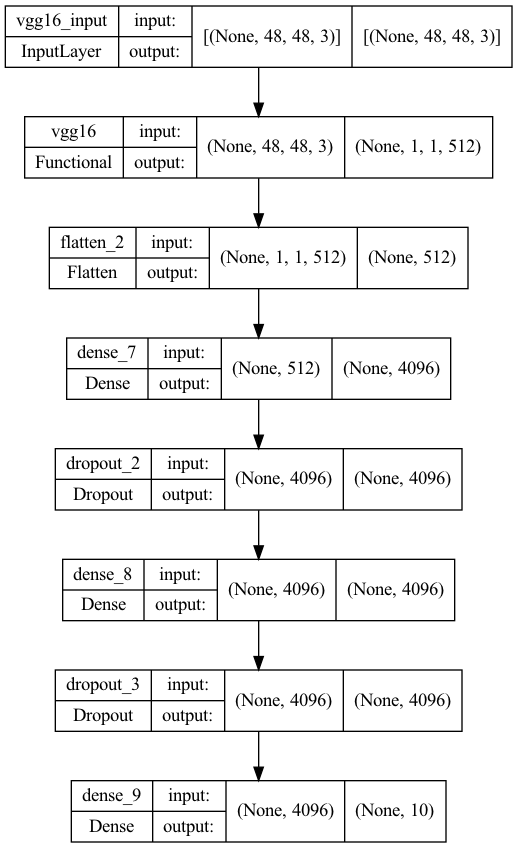

In [6]:
x_train = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR)for i in train_X_mnist]
x_test = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR)for i in test_X_mnist]

x_train = np.concatenate([arr[np.newaxis]for arr in x_train])
x_test = np.concatenate([arr[np.newaxis]for arr in x_test])

x_train = x_train.astype("float32")/255
x_train = x_train.reshape((60000,48,48,3))
x_test = x_test.astype("float32")/255
x_test = x_test.reshape((10000,48,48,3))

x_val = x_train[:10000]
y_val = train_y_mnist[:10000]
x_train = x_train[10000:]
y_train = train_y_mnist[10000:]

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(48,48,3))
conv_base.trainable = False
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='VGG16.png')

Image('VGG16.png')

# InceptionV3

87924736/87910968 [==============================] - 8s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 4096)              8392704   
                                                                 
 dropout_4 (Dropout)         (None, 4096)              0         
                                                                 
 dense_11 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_5 (Dropout)         (None, 4096)              0         
                                                       

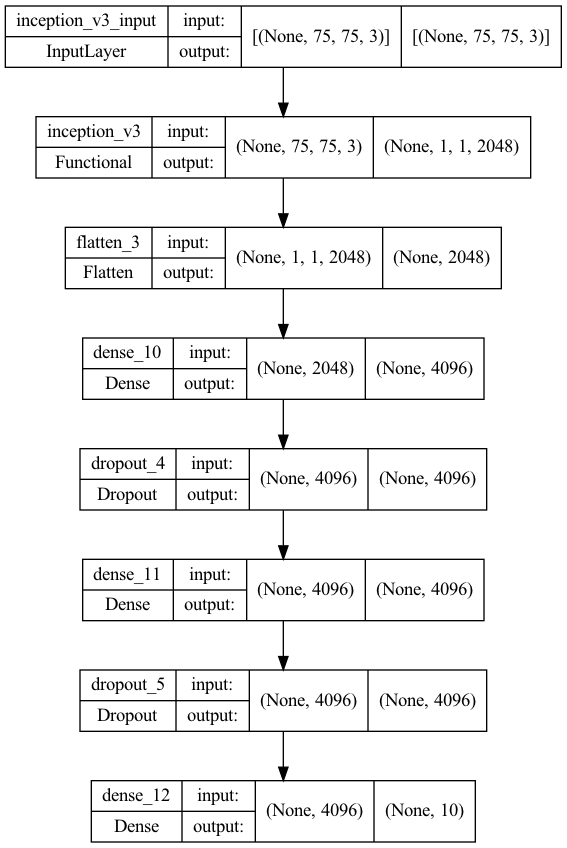

In [7]:
x_train = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in train_X_mnist]
x_test = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in test_X_mnist]

x_train = np.concatenate([arr[np.newaxis]for arr in x_train])
x_test = np.concatenate([arr[np.newaxis]for arr in x_test])
x_train = x_train.astype("float32")/255
x_train = x_train.reshape((60000,75,75,3))
x_test = x_test.astype("float32")/255
x_test = x_test.reshape((10000,75,75,3))

x_val = x_train[:10000]
y_val = train_y_mnist[:10000]
x_train = x_train[10000:]
y_train = train_y_mnist[10000:]

conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='InceptionV3.png')

Image('InceptionV3.png')

# ResNet50V2 

94683136/94668760 [==============================] - 8s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_13 (Dense)            (None, 4096)              75501568  
                                                                 
 dropout_6 (Dropout)         (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_7 (Dropout)         (None, 4096)              0         
                                                       

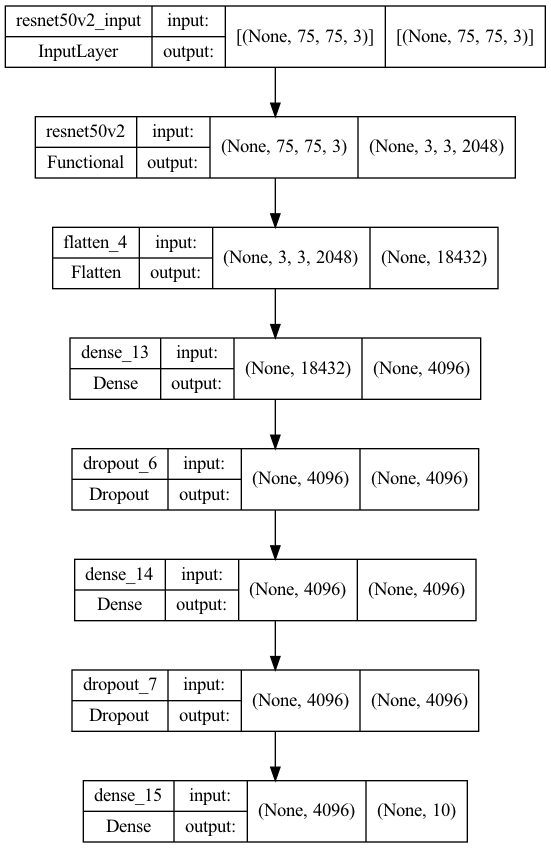

In [8]:
x_train = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in train_X_mnist]
x_test = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in test_X_mnist]

x_train = np.concatenate([arr[np.newaxis]for arr in x_train])
x_test = np.concatenate([arr[np.newaxis]for arr in x_test])
x_train = x_train.astype("float32")/255
x_train = x_train.reshape((60000,75,75,3))
x_test = x_test.astype("float32")/255
x_test = x_test.reshape((10000,75,75,3))

x_val = x_train[:10000]
y_val = train_y_mnist[:10000]
x_train = x_train[10000:]
y_train = train_y_mnist[10000:]

conv_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(75,75,3))
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='ResNet50V2.png')

Image('ResNet50V2.png')

#### Best model is LeNet

In [9]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X_fashion_mnist, train_y_fashion_mnist, validation_data=(test_X_fashion_mnist, test_y_fashion_mnist), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4860 - accuracy: 0.8218 - val_loss: 0.4159 - val_accuracy: 0.8470
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3607 - accuracy: 0.8648 - val_loss: 0.3874 - val_accuracy: 0.8576
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3324 - accuracy: 0.8754 - val_loss: 0.4003 - val_accuracy: 0.8554
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3216 - accuracy: 0.8783 - val_loss: 0.3452 - val_accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3047 - accuracy: 0.8851 - val_loss: 0.3399 - val_accuracy: 0.8711
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3012 - accuracy: 0.8871 - val_loss: 0.3341 - val_accuracy: 0.8773
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2880 - accuracy: 0.8910 - val_loss: 0.3396 - val_ac

In [10]:
predictions_soft = model.predict(test_X_fashion_mnist)
predictions = []
for i in range(len(predictions_soft)):
    predictions.append(np.argmax(predictions_soft[i]))

test_y = [np.where(r==1)[0][0] for r in test_y_fashion_mnist.copy()]

confusion_matrix(test_y, predictions)

array([[890,   0,   8,  12,   1,   1,  76,   0,  12,   0],
       [  3, 969,   0,  18,   3,   0,   6,   0,   1,   0],
       [ 16,   0, 716,   8, 145,   0, 111,   0,   4,   0],
       [ 29,   0,   6, 897,  35,   0,  29,   0,   4,   0],
       [  1,   1,  54,  31, 801,   0, 105,   0,   7,   0],
       [  0,   0,   0,   1,   0, 971,   0,  19,   2,   7],
       [179,   2,  61,  23,  84,   0, 633,   0,  18,   0],
       [  0,   0,   0,   0,   0,  20,   0, 964,   1,  15],
       [  1,   2,   1,   2,   3,   2,   5,   1, 982,   1],
       [  0,   0,   0,   1,   0,   7,   0,  38,   1, 953]])

In [11]:
def get_matrix(xs_test, ys_test, predictions_soft, classes_cnt):
    m = []
    matrix = []
    for i in range(classes_cnt):
        m.append([0] * classes_cnt)
        matrix.append([0] * classes_cnt)

    for i in range(len(xs_test)):
        actual = ys_test[i]
        for j in range(classes_cnt):
            if predictions_soft[i][j] > m[actual][j]:
                m[actual][j] = predictions_soft[i][j]
                matrix[actual][j] = i
    return matrix

In [15]:
m = get_matrix(test_X_fashion_mnist, test_y, predictions_soft, classes_cnt=10)
m

[[2978, 9748, 8919, 1111, 8324, 3466, 2506, 2897, 2599, 764],
 [8757, 1402, 2111, 787, 5597, 3974, 8768, 3974, 6331, 5533],
 [8914, 9582, 148, 4041, 3496, 7165, 4300, 7288, 9256, 9544],
 [979, 4247, 2318, 8083, 5576, 713, 1326, 8742, 1852, 3739],
 [4526, 8621, 6751, 4922, 1407, 5628, 6899, 5192, 6559, 378],
 [5561, 6168, 9492, 5561, 8423, 6198, 8423, 8292, 7802, 6061],
 [5806, 3829, 1496, 147, 1643, 5885, 6582, 5249, 5123, 1277],
 [4058, 6088, 12, 7525, 12, 9804, 9715, 7691, 8376, 2914],
 [669, 635, 3765, 3008, 5470, 1300, 1286, 3468, 4640, 1778],
 [5512, 4653, 5512, 3999, 4132, 23, 1537, 441, 5512, 4133]]

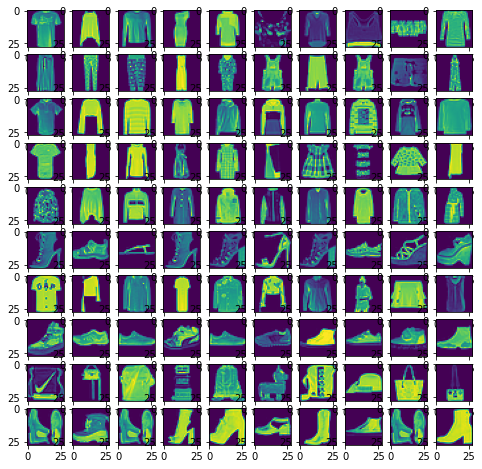

In [16]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))

for ind in range(1, len(predictions_soft[0]) ** 2 + 1):
    i = (ind - 1) // len(predictions_soft[0])
    j = (ind - 1) % len(predictions_soft[0])

    index = m[i][j]
    img = test_X_fashion_mnist[index]

    figure.add_subplot(len(predictions_soft[0]), len(predictions_soft[0]), ind)
    plt.imshow(img)